In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import time
import h5py
import os,sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DSPACK_HOME=os.environ.get("DSPACK_HOME")
if DSPACK_HOME not in sys.path:
    sys.path.append(DSPACK_HOME)

In [4]:
import scripts.fsystem
import scripts.statistics

In [5]:
workdir = "/reg/data/ana03/scratch/zhensu/Experiment/ICH/20201225/"
dnames = ["WT-1", "WT-2", "WT-3", "G150A-1", "G150A-2", "G150A-3", "G150T-1", "G150T-2", "G150T-3"]

In [6]:
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple",\
          "tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
resolution_A = np.around(1./np.linspace(0.1,1./1.4,5),1)

dpi =  467


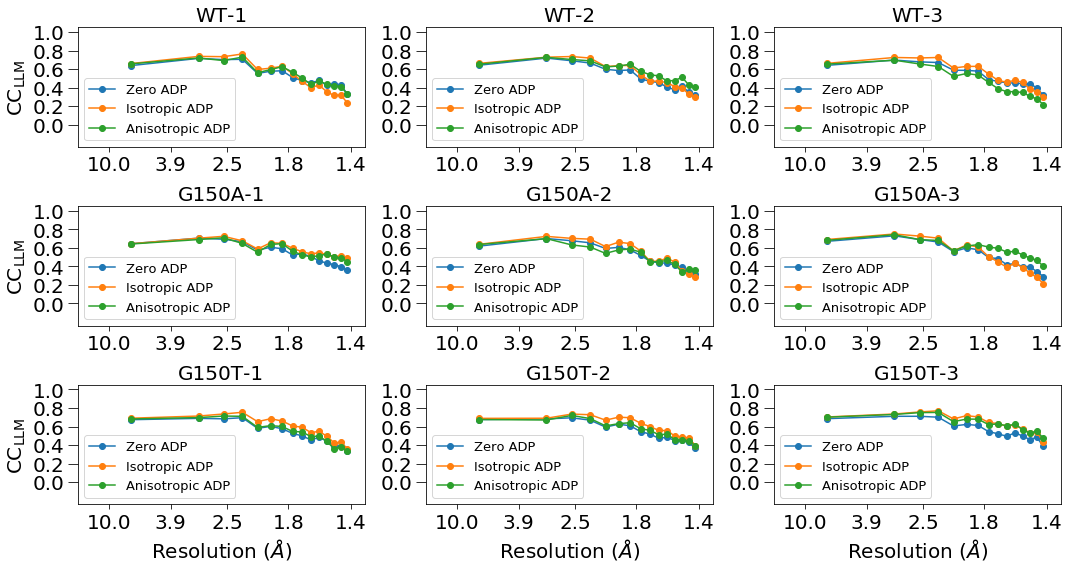

In [8]:
plt.figure(figsize=(15,8))

for idx, dname in enumerate(dnames):
    path_dsdata = "%s/data/%s/standard_clean_data_scale_profile_with_pca_map1.dsdata"%(workdir,dname)
    path_llm = scripts.fsystem.H5manager.reader(path_dsdata,"lunus_llm_refmac5")
    
    with h5py.File(path_llm,"r") as f:
        b_factor_mode = "zero"
        rmax_A = f["lunus_llm_%s_rmax_A_curve"%b_factor_mode][()]
        rmin_A = f["lunus_llm_%s_rmin_A_curve"%b_factor_mode][()]
        llm_zero_cc_resolution_shell_invA = (1./rmax_A + 1./rmin_A)/2.
        llm_zero_cc_per_shell = f["lunus_llm_%s_ccllm_curve"%b_factor_mode][()]

        b_factor_mode = "iso"
        rmax_A = f["lunus_llm_%s_rmax_A_curve"%b_factor_mode][()]
        rmin_A = f["lunus_llm_%s_rmin_A_curve"%b_factor_mode][()]
        llm_iso_cc_resolution_shell_invA = (1./rmax_A + 1./rmin_A)/2. 
        llm_iso_cc_per_shell = f["lunus_llm_%s_ccllm_curve"%b_factor_mode][()]

        b_factor_mode = "aniso"
        rmax_A = f["lunus_llm_%s_rmax_A_curve"%b_factor_mode][()]
        rmin_A = f["lunus_llm_%s_rmin_A_curve"%b_factor_mode][()]
        llm_aniso_cc_resolution_shell_invA = (1./rmax_A + 1./rmin_A)/2.
        llm_aniso_cc_per_shell = f["lunus_llm_%s_ccllm_curve"%b_factor_mode][()]
    
    plt.subplot(3,3,idx+1)
    plt.plot(llm_zero_cc_resolution_shell_invA*10,  llm_zero_cc_per_shell,  "-o", label="Zero ADP",   color=colors[0])
    plt.plot(llm_iso_cc_resolution_shell_invA*10,   llm_iso_cc_per_shell,   "-o", label="Isotropic ADP", color=colors[1])
    plt.plot(llm_aniso_cc_resolution_shell_invA*10, llm_aniso_cc_per_shell, "-o", label="Anisotropic ADP", color=colors[2])
    
    plt.xlim(0.2,7.5)
    plt.ylim(-0.24,1.05)
    plt.legend(loc=3,fontsize=13)
    plt.title("%s"%dname, fontsize=20)
    if idx in [6,7,8]:
        plt.xlabel("Resolution ($\AA$)",fontsize=20)
    if idx in [0,3,6]:
        plt.ylabel("CC$_{\mathrm{LLM}}$",fontsize=20)
    plt.xticks(10./resolution_A, resolution_A, fontsize=20)
    plt.yticks(np.around(np.arange(0,1.1,0.2),1), np.around(np.arange(0,1.1,0.2),1), fontsize=20)
    plt.tick_params('y', length=10,  which='major')
    plt.tick_params('x', length=5, which='major')
    plt.tight_layout()
    
fig = plt.gcf()
max_fit_dpi = min(int(np.sqrt(25.*1024**2/np.prod(fig.get_size_inches()))),600)
print "dpi = ", max_fit_dpi
plt.tight_layout()
plt.savefig("./600dpi/Fig_S10_CC_LLM.jpg",dpi=600,bbox_inches='tight',pad_inches=0,transparent=True)
plt.savefig("./fitgdoc/Fig_S10_CC_LLM.jpg",dpi=max_fit_dpi,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()